# Heart Stroke Prediction using XGBoost and Random Forest

In [1]:
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading data from the files

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


#### Exploratory Data Analysis

In [4]:
df.shape

(5110, 12)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

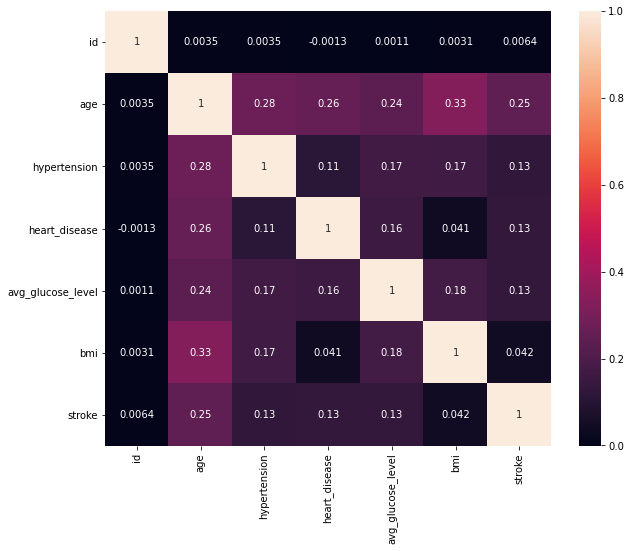

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
# dropping nulls in bmi from the dataset
df=df.dropna().reset_index(drop=True)

In [9]:
# sanity check
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# dropping id column because it is unique for each row
df=df.drop(columns=['id'])

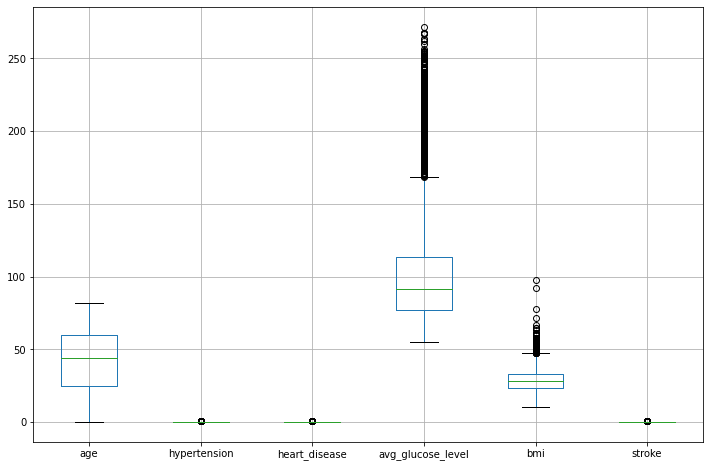

In [11]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.show()

### Boxplot of Numerical features in the data shows the presence of outliers in avg_glucose_level and bmi

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


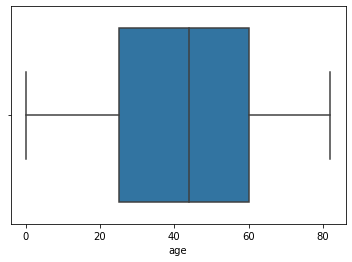

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


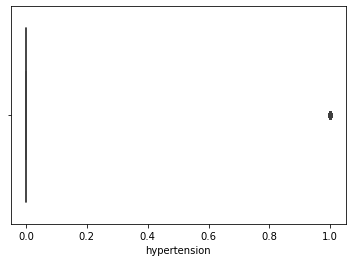

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


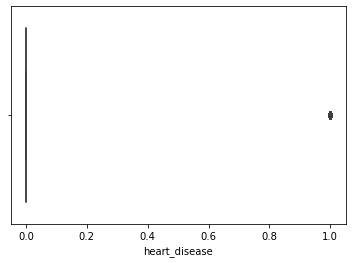

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


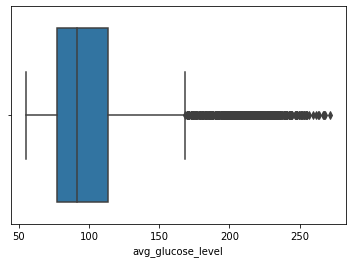

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


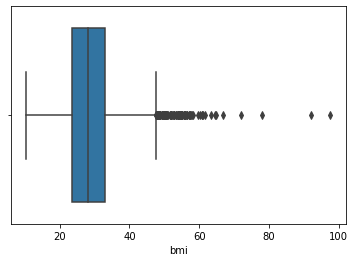

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


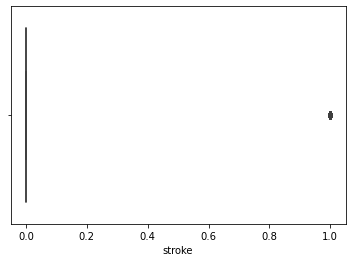

In [12]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[i])
    plt.show()

### Boxplot of Numerical features in the data shows the presence of outliers in avg_glucose_level and bmi

In [13]:
# type conversion of hypertension, heart disease and stroke
df['hypertension']=df['hypertension'].astype(object)
df['heart_disease']=df['heart_disease'].astype(object)
df['stroke']=df['stroke'].astype(object)


In [14]:
# converting data into numerical and categorical
df_int=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)

In [15]:
# sanity check 
df_int.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0


In [16]:
# sanity check
df_cat.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Male,0,1,Yes,Private,Rural,never smoked,1
2,Female,0,0,Yes,Private,Urban,smokes,1
3,Female,1,0,Yes,Self-employed,Rural,never smoked,1
4,Male,0,0,Yes,Private,Urban,formerly smoked,1


F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


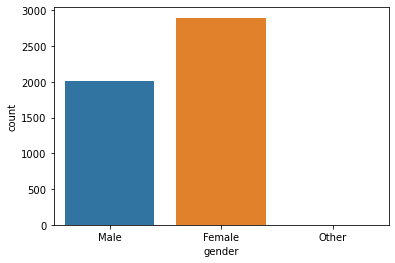

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


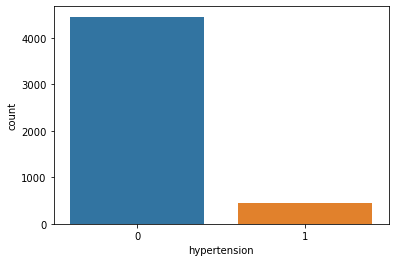

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


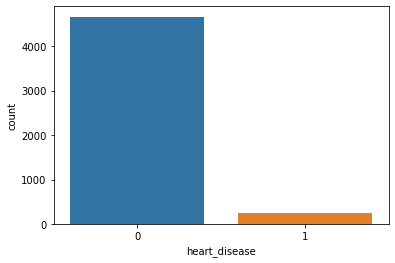

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


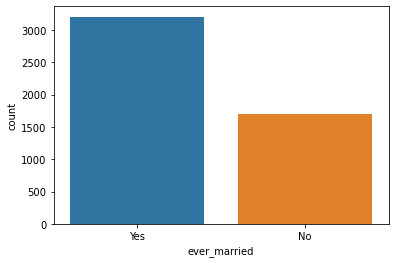

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


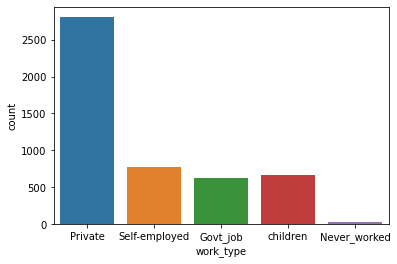

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


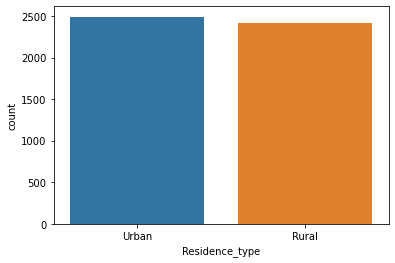

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


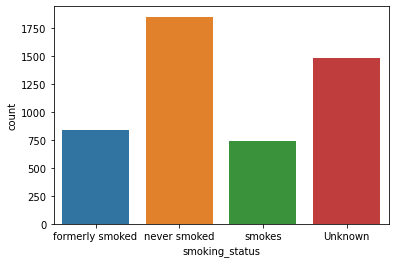

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


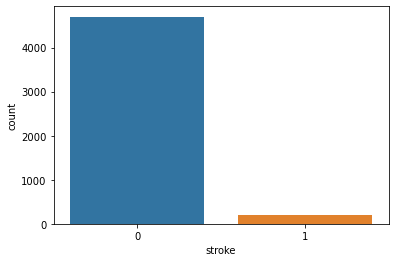

In [17]:
# Countplot of our Categorical Variables
for i in df_cat:
    sns.countplot(df[i])
    plt.show()

### From this we infer that our predictor is very highly imbalanced. To treat imbalance we could go with Oversampling or Undersampling techniques(like SMOTE), but further in this problem we have used SMOTE(Oversampling)

# Bivariate Analysis

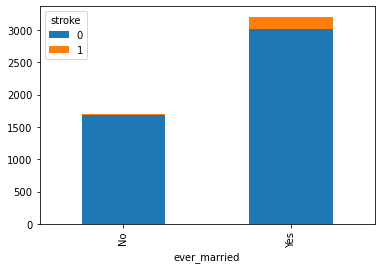

In [58]:
pd.crosstab(df['ever_married'],df['stroke']).plot(kind='bar',stacked=True)
plt.show()

### We can easily visualize that people who have ever been maried have a larger number of stroke than compared to the non married

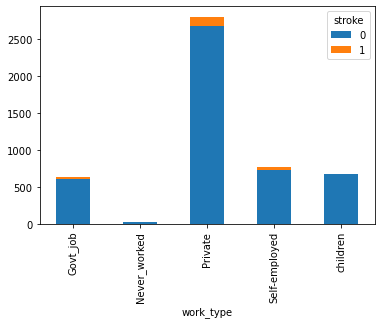

In [59]:
pd.crosstab(df['work_type'],df['stroke']).plot(kind='bar',stacked=True)
plt.show()

### We can easily visualize that people who have been working in private sector have larger possibility of stroke than any other profession

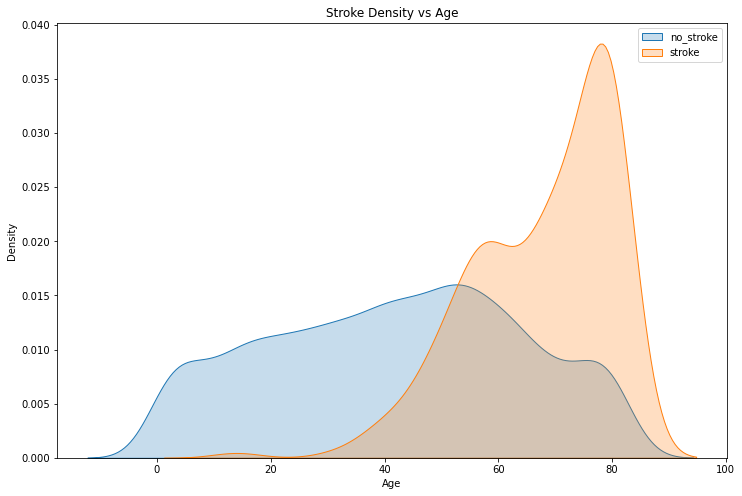

In [19]:
plt.figure(figsize=(12,8))
sns.kdeplot(df[df['stroke']==0]['age'],shade=True,label='no_stroke')
sns.kdeplot(df[df['stroke']==1]['age'],shade=True,label='stroke')
plt.xlabel('Age')
plt.title('Stroke Density vs Age')
plt.legend()

plt.show()

### We can see that people with age between 60-90 have most likely to have a stroke

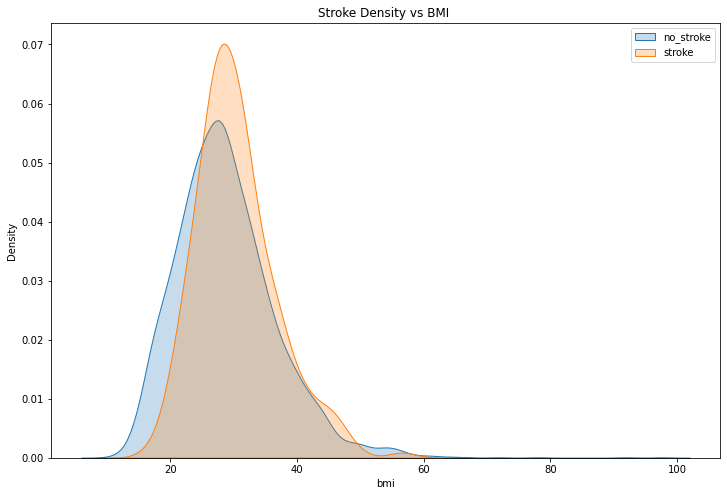

In [20]:
plt.figure(figsize=(12,8))
sns.kdeplot(df[df['stroke']==0]['bmi'],shade=True,label='no_stroke')
sns.kdeplot(df[df['stroke']==1]['bmi'],shade=True,label='stroke')
plt.legend()
plt.title('Stroke Density vs BMI ')
plt.show()

### We can easily  see that bmi is not affecting the target that much

In [21]:
# Separating Dependent and Predictor variables
X=pd.get_dummies(df,columns=df_cat.columns,drop_first=True).iloc[:,:-2]
y=pd.to_numeric(df['stroke'])

In [22]:
# splitting into train and test sets into stratified sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=8)

In [23]:
# sanity check
y_train.value_counts()

0    3524
1     157
Name: stroke, dtype: int64

In [24]:
# sanity check
y_test.value_counts()

0    1176
1      52
Name: stroke, dtype: int64

In [25]:
# Applying SMOTE for treating imbalance in our data
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=8)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(y_train_sm.value_counts())

0    3524
1    3524
Name: stroke, dtype: int64


### Logistic regression without SMOTE

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)
print('Train:',log_reg.score(X_train,y_train))
print('Test:',log_reg.score(X_test,y_test))

y_pred_lr=log_reg.predict(X_test)

Train: 0.9576202118989405
Test: 0.9576547231270358


In [30]:
pd.DataFrame(y_pred_lr).value_counts()

0    1228
dtype: int64

In [28]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228

F:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

### Logistic Regression with SMOTE

In [31]:
log_regsm=LogisticRegression(max_iter=1000)
log_regsm.fit(X_train_sm,y_train_sm)
print('Train:',log_regsm.score(X_train_sm,y_train_sm))
print('Test:',log_regsm.score(X_test,y_test))

y_pred_lrsm=log_regsm.predict(X_test)

Train: 0.8471906923950057
Test: 0.8127035830618893


In [32]:
print(classification_report(y_test,y_pred_lrsm))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1176
           1       0.12      0.52      0.19        52

    accuracy                           0.81      1228
   macro avg       0.55      0.67      0.54      1228
weighted avg       0.94      0.81      0.86      1228



### Logistic Regression with SMOTE gives better Precision,Recall and F1-SCore as compared to Logistic Regression without SMOTE

### Decision tree without SMOTE

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('Train:',dtc.score(X_train,y_train))
print('Test:',dtc.score(X_test,y_test))

y_pred_dt=dtc.predict(X_test)

Train: 1.0
Test: 0.9071661237785016


In [34]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1176
           1       0.03      0.04      0.03        52

    accuracy                           0.91      1228
   macro avg       0.49      0.49      0.49      1228
weighted avg       0.92      0.91      0.91      1228



## Decision Tree with SMOTE

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtcsm=DecisionTreeClassifier()
dtcsm.fit(X_train_sm,y_train_sm)
print('Train:',dtcsm .score(X_train_sm,y_train_sm))
print('Test:',dtcsm.score(X_test,y_test))

y_pred_dtsm=dtcsm.predict(X_test)

Train: 1.0
Test: 0.8778501628664495


In [36]:
print(classification_report(y_test,y_pred_dtsm))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1176
           1       0.10      0.23      0.14        52

    accuracy                           0.88      1228
   macro avg       0.53      0.57      0.54      1228
weighted avg       0.93      0.88      0.90      1228



### Decision Tree with SMOTE gives better Precision,Recall and F1-SCore as compared to Decision Tree without SMOTE

## KNN without SMOTE

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print('Train:',knn.score(X_train,y_train))
print('Test:',knn.score(X_test,y_test))

y_pred_knn=knn.predict(X_test)


Train: 0.9573485465906004
Test: 0.9568403908794788


In [39]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.33      0.02      0.04        52

    accuracy                           0.96      1228
   macro avg       0.65      0.51      0.51      1228
weighted avg       0.93      0.96      0.94      1228



### KNN with SMOTE

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knnsm=KNeighborsClassifier()
knnsm.fit(X_train_sm,y_train_sm)
print('Train:',knnsm.score(X_train_sm,y_train_sm))
print('Test:',knnsm.score(X_test,y_test))

y_pred_knnsm=knnsm.predict(X_test)

Train: 0.9196935300794552
Test: 0.8013029315960912


In [42]:
print(classification_report(y_test,y_pred_knnsm))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1176
           1       0.12      0.58      0.20        52

    accuracy                           0.80      1228
   macro avg       0.55      0.69      0.54      1228
weighted avg       0.94      0.80      0.86      1228



### KNN with SMOTE gives better Recall and F1-SCore as compared to KNN without SMOTE

## Naive Bayes without SMOTE

In [43]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_train,y_train)
print('Train:',naive.score(X_train,y_train))
print('Test:',naive.score(X_test,y_test))

y_pred_gnb=naive.predict(X_test)

Train: 0.5468622656886716
Test: 0.5399022801302932


In [44]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.99      0.52      0.69      1176
           1       0.08      0.92      0.15        52

    accuracy                           0.54      1228
   macro avg       0.54      0.72      0.42      1228
weighted avg       0.95      0.54      0.66      1228



## Naive Bayes with SMOTE

In [45]:
from sklearn.naive_bayes import GaussianNB
naivesm=GaussianNB()
naivesm.fit(X_train_sm,y_train_sm)
print('Train:',naivesm.score(X_train_sm,y_train_sm))
print('Test:',naivesm.score(X_test,y_test))

y_pred_naivesm=naivesm.predict(X_test)

Train: 0.6494040862656073
Test: 0.3265472312703583


In [46]:
print(classification_report(y_test,y_pred_naivesm))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46      1176
           1       0.06      1.00      0.11        52

    accuracy                           0.33      1228
   macro avg       0.53      0.65      0.28      1228
weighted avg       0.96      0.33      0.44      1228



### Naive Bayes with SMOTE gives lower F1-SCore as compared to Naive Bayes without SMOTE

# Applying Cross validation to check Sampling Bias

In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LogisticRegression(max_iter=1000),X_train,y_train,cv=10,scoring='accuracy')
print(score)

[0.95663957 0.95923913 0.95923913 0.95923913 0.95652174 0.95652174
 0.95652174 0.95652174 0.95652174 0.95652174]


In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X_train,y_train,cv=10,scoring='accuracy')
print(score)

[0.91327913 0.92119565 0.91576087 0.91576087 0.91304348 0.92663043
 0.92391304 0.92119565 0.92663043 0.92391304]


In [49]:
from sklearn.metrics import roc_auc_score,roc_curve

def roc_curve1(model):
    pred_proba=model.predict_proba(X_test)
    fpr,tpr,th = roc_curve(y_test,pred_proba[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    plt.title('ROC curve for Classifier')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, pred_proba[:,1]),4)))
    plt.grid(True)
    plt.show()

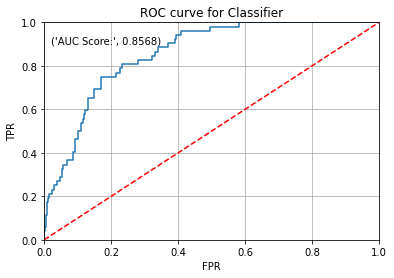

In [50]:
roc_curve1(log_reg)

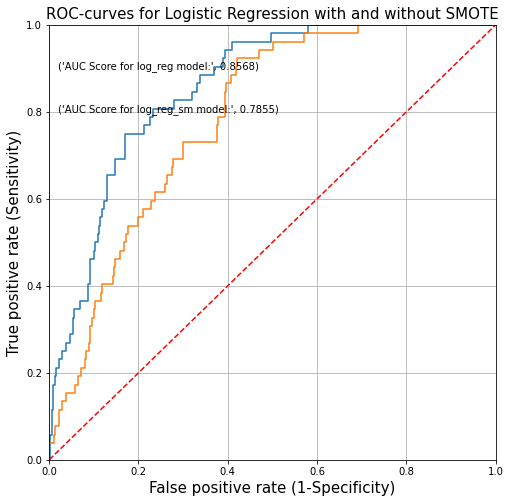

In [51]:
#### ROC curve along with scores for comparing 2 algorithms
## 1st classifier

y_pred_proba= log_reg.predict_proba(X_test)[:,1]

y_pred_probasm= log_regsm.predict_proba(X_test)[:,1]

plt.figure(figsize = (8, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC-curves for Logistic Regression with and without SMOTE', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for log_reg model:',round(roc_auc_score(y_test, y_pred_proba),4)))
## 2nd classifier
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_probasm)
plt.plot(fpr1, tpr1)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for log_reg_sm model:',round(roc_auc_score(y_test, y_pred_probasm),4)))
plt.grid(True)

## Validation Curve for Logistic Regression Model without SMOTE 

(0.5, 1.0)

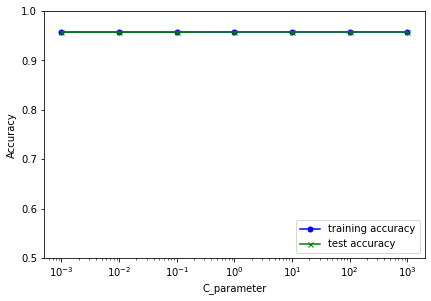

In [56]:
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import validation_curve

C_param_range = [0.001,0.01,0.1,1,10,100,1000]

plt.figure(figsize=(15, 10))

# Logistic Regression validation curve
train_scores, test_scores = validation_curve(estimator=log_reg,X=X_train,y=y_train ,param_name='C',param_range=C_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.subplot(2,2,1)
plt.semilogx(C_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.semilogx(C_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

## Validation Curve for Decision Tree Model without SMOTE 

(0.5, 1.0)

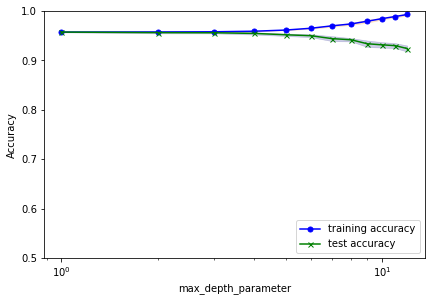

In [59]:
dtc_param_range = np.arange(1,13)

plt.figure(figsize=(15, 10))

# Decision Tree validation curve
train_scores, test_scores = validation_curve(estimator=dtc,X=X_train,y=y_train ,param_name='max_depth',param_range=dtc_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

lw=0.5
plt.subplot(2,2,1)
plt.semilogx(dtc_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
plt.fill_between(dtc_param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)    
plt.semilogx(dtc_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
plt.fill_between(dtc_param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)

plt.xlabel('max_depth_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

## Validation Curve for Decision Tree Model with SMOTE 

(0.5, 1.0)

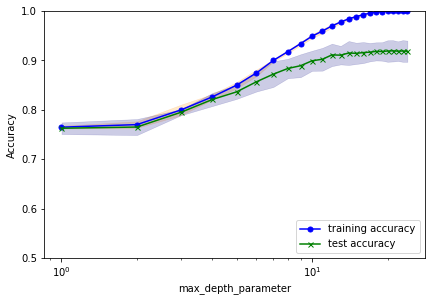

In [67]:
dtc_param_range = np.arange(1,25)

plt.figure(figsize=(15, 10))

# Decision Tree(SMOTE) validation curve
train_scores, test_scores = validation_curve(estimator=dtcsm,X=X_train_sm,y=y_train_sm ,param_name='max_depth',param_range=dtc_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

lw=0.5
plt.subplot(2,2,1)
plt.semilogx(dtc_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
plt.fill_between(dtc_param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)    
plt.semilogx(dtc_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
plt.fill_between(dtc_param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)

plt.xlabel('max_depth_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

## Tuning Decision Tree without SMOTE by taking Hyperparameter range as per Validation Curve

In [60]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['entropy', 'gini'],'max_depth': range(2, 10),'min_samples_split' : range(1,5)}
dt=DecisionTreeClassifier()
grid=GridSearchCV(dt,params,cv=5)
grid.fit(X_train,y_train)

print('The best value of hyperparameters "criterion", "max_depth", and "min_samples_split"')
print(grid.best_params_)

The best value of hyperparameters "criterion", "max_depth", and "min_samples_split"
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}


## Fitting Decision Tree algo without SMOTE using the hyperparameters deduced above

In [61]:
dt_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_split=2)
dt_tuned.fit(X_train,y_train)

y_pred_dttuned= dt_tuned.predict(X_test)

dt_tuned.score(X_train,y_train)

0.9573485465906004

In [62]:
print(classification_report(y_test,y_pred_dttuned))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



In [63]:
dt_tuned.score(X_test,y_test)

0.9576547231270358

## Tuning Decision Tree with SMOTE by taking Hyperparameter range as per Validation Curve

In [68]:
from sklearn.model_selection import GridSearchCV

Parameter_Trials={'max_depth': [11,12,13,14,15,16]}

Grid_Search = GridSearchCV(dtcsm, Parameter_Trials, cv=5, n_jobs=1)
GridSearchResults=Grid_Search.fit(X_train_sm,y_train_sm)

print('The best value of hyperparameters "max_depth" :')
print(Grid_Search.best_params_)

The best value of hyperparameters "max_depth" :
{'max_depth': 16}


In [69]:
dtsm_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=16)
dtsm_tuned.fit(X_train_sm,y_train_sm)

y_pred_dtsmtuned= dtsm_tuned.predict(X_test)

dtsm_tuned.score(X_train_sm,y_train_sm)

0.9971623155505108

In [70]:
print(classification_report(y_test,y_pred_dtsmtuned))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1176
           1       0.11      0.25      0.15        52

    accuracy                           0.88      1228
   macro avg       0.54      0.58      0.54      1228
weighted avg       0.93      0.88      0.90      1228



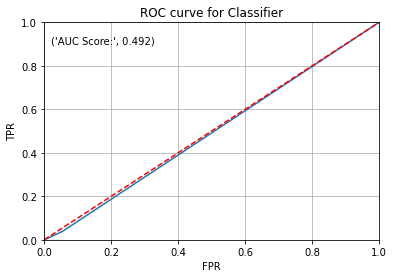

In [71]:
# ROC-Curve for Decision Tree
roc_curve1(dtc)

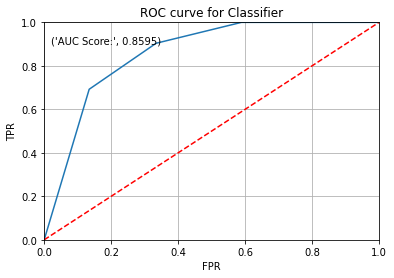

In [72]:
# ROC-Curve for tuned Decision Tree
roc_curve1(dt_tuned)

## Comparing AUC Score along with ROC curve for Decision Tree, tuned Decision Tree, Decision Tree with SMOTE and tuned Decision Tree with SMOTE 

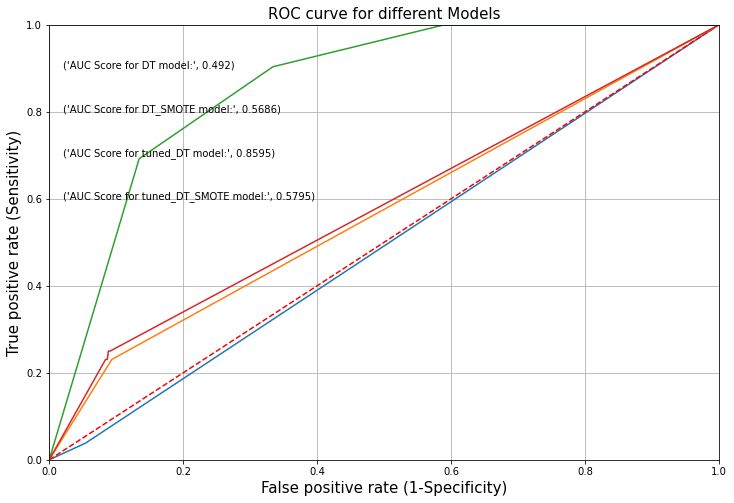

In [74]:
y_pred_probad= dtc.predict_proba(X_test)[:,1]

y_pred_probadsm= dtcsm.predict_proba(X_test)[:,1]

y_pred_probad_tuned= dt_tuned.predict_proba(X_test)[:,1]

y_pred_probadsm_tuned= dtsm_tuned.predict_proba(X_test)[:,1]

plt.figure(figsize = (12, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probad)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for different Models', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for DT model:',round(roc_auc_score(y_test, y_pred_probad),4)))
## 2nd classifier
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_probadsm)
plt.plot(fpr1, tpr1)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for DT_SMOTE model:',round(roc_auc_score(y_test, y_pred_probadsm),4)))
plt.grid(True)

## 3rd classifier
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_probad_tuned)
plt.plot(fpr2, tpr2)
plt.text(x = 0.02, y = 0.7, s = ('AUC Score for tuned_DT model:',round(roc_auc_score(y_test, y_pred_probad_tuned),4)))
plt.grid(True)

## 4th classifier
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_probadsm_tuned)
plt.plot(fpr3, tpr3)
plt.text(x = 0.02, y = 0.6, s = ('AUC Score for tuned_DT_SMOTE model:',round(roc_auc_score(y_test, y_pred_probadsm_tuned),4)))
plt.grid(True)

## Applying Ensemble Techniques 

# Random Forest without SMOTE

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

1.0

In [76]:
y_pred_rf=rf.predict(X_test)

In [77]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



In [78]:
rf.score(X_test,y_test)

0.9552117263843648

(0.9, 1.0)

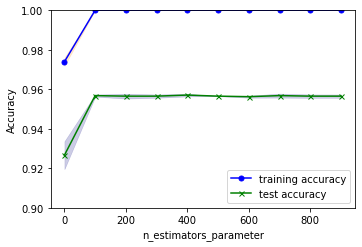

In [81]:
# Validation Curve for Random Forest without SMOTE
rf_param_range = np.arange(1,1000,100)

plt.figure(figsize=(12,8))

train_scores, test_scores = validation_curve(estimator=rf,X=X_train,y=y_train ,param_name='n_estimators',param_range=rf_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

lw=0.5
plt.subplot(2,2,1)
plt.plot(rf_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
plt.fill_between(rf_param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.plot(rf_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
plt.fill_between(rf_param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)

    
plt.xlabel('n_estimators_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9,1])

(0.9, 1.0)

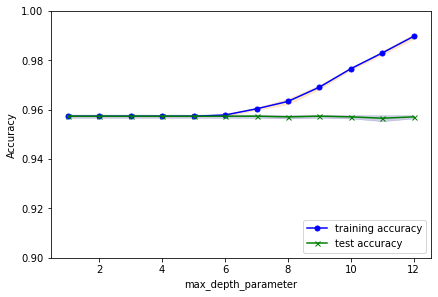

In [82]:
# Validation Curve for Random Forest without SMOTE
rf_param_range = np.arange(1,13)

plt.figure(figsize=(15, 10))

train_scores, test_scores = validation_curve(estimator=rf,X=X_train,y=y_train ,param_name='max_depth',param_range=rf_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

lw=0.5
plt.subplot(2,2,1)
plt.plot(rf_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
plt.fill_between(rf_param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.plot(rf_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
plt.fill_between(rf_param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)

    
plt.xlabel('max_depth_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9,1])

## Tuning Random Forest without SMOTE by taking Hyperparameter range as per Validation Curve

In [83]:
params={'criterion':['entropy', 'gini'],'max_depth': range(2,8),'n_estimators' : range(1,200,50)}

grid_rf=GridSearchCV(rf,params,cv=5)
grid_rf.fit(X_train,y_train)

print('The best value of hyperparameters "criterion", "max_depth", and "min_samples_split"')
print(grid_rf.best_params_)

The best value of hyperparameters "criterion", "max_depth", and "min_samples_split"
{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 1}


In [84]:
rf_tuned=RandomForestClassifier(n_estimators=1,max_depth=2,criterion='entropy')

rf_tuned.fit(X_train,y_train)
rf_tuned.score(X_train,y_train)

y_pred_tunedrf=rf_tuned.predict(X_test)

In [85]:
rf_tuned.score(X_test,y_test)

0.9576547231270358

In [86]:

print(classification_report(y_test,y_pred_tunedrf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



## Applying Random Forest with SMOTE 

In [87]:
rf_sm=RandomForestClassifier()

rf_sm.fit(X_train_sm,y_train_sm)
rf_sm.score(X_train_sm,y_train_sm)

1.0

In [88]:
y_pred_rfsm=rf_sm.predict(X_test)

In [89]:
print(classification_report(y_test,y_pred_rfsm))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1176
           1       0.09      0.13      0.10        52

    accuracy                           0.90      1228
   macro avg       0.52      0.54      0.53      1228
weighted avg       0.92      0.90      0.91      1228



(0.9, 1.0)

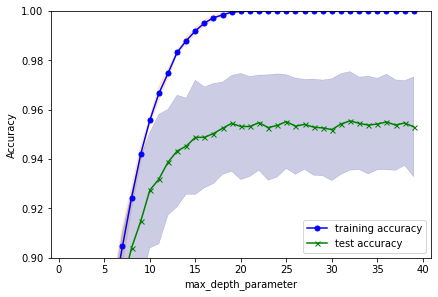

In [90]:
# Validation Curve for Random Forest model with SMOTE
rfsm_param_range = np.arange(1,40)

plt.figure(figsize=(15, 10))

train_scores, test_scores = validation_curve(estimator=rf_sm,X=X_train_sm,y=y_train_sm ,param_name='max_depth',param_range=rfsm_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

lw=0.5
plt.subplot(2,2,1)
plt.plot(rfsm_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
plt.fill_between(rfsm_param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.plot(rfsm_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
plt.fill_between(rfsm_param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)

    
plt.xlabel('max_depth_parameters')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9,1])

(0.9, 1.0)

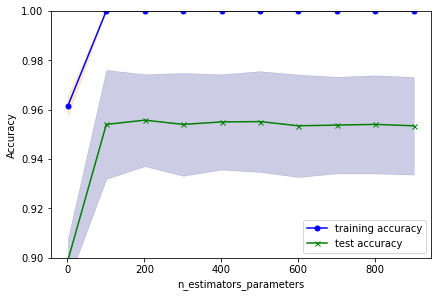

In [91]:
# Validation Curve for Random Forest model with SMOTE
rfsm_param_range = np.arange(1,1000,100)

plt.figure(figsize=(15, 10))

train_scores, test_scores = validation_curve(estimator=rf_sm,X=X_train_sm,y=y_train_sm ,param_name='n_estimators',param_range=rfsm_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

lw=0.5
plt.subplot(2,2,1)
plt.plot(rfsm_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
plt.fill_between(rfsm_param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.plot(rfsm_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
plt.fill_between(rfsm_param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)

    
plt.xlabel('n_estimators_parameters')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9,1])

In [92]:
from sklearn.model_selection import GridSearchCV
Parameter_Trials={'criterion':['gini','entropy'],
                  'n_estimators': range(100,500,100),'max_depth':[15,16,17,18,19,20,21,22,23]}
 
Grid_Search = GridSearchCV(rf_sm, Parameter_Trials, cv=5, n_jobs=1)
GridSearchResults=Grid_Search.fit(X,y)
Grid_Search.best_params_

{'criterion': 'gini', 'max_depth': 17, 'n_estimators': 300}

In [93]:
rf_smtuned=RandomForestClassifier(criterion='gini',n_estimators=300,max_depth=17)

rf_smtuned.fit(X_train_sm,y_train_sm)
rf_smtuned.score(X_train_sm,y_train_sm)

y_pred_rfsmtuned=rf_smtuned.predict(X_test)

In [94]:
print(classification_report(y_test,y_pred_rfsmtuned))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1176
           1       0.08      0.12      0.09        52

    accuracy                           0.90      1228
   macro avg       0.52      0.53      0.52      1228
weighted avg       0.92      0.90      0.91      1228



## Comparing AUC Score along with ROC curve for Random Forest, tuned Random Forest, Random Forest with SMOTE and tuned Random Forest with SMOTE 

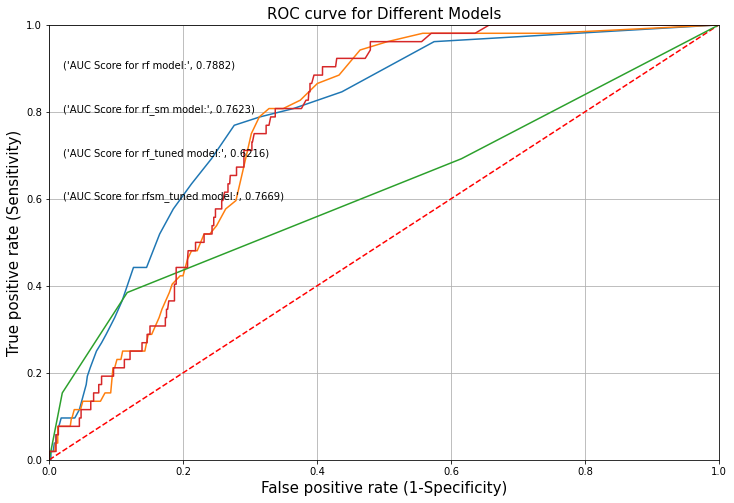

In [95]:
y_pred_probarf= rf.predict_proba(X_test)[:,1]

y_pred_probarfsm= rf_sm.predict_proba(X_test)[:,1]

y_pred_probarf_tuned= rf_tuned.predict_proba(X_test)[:,1]

y_pred_probadrfsm_tuned= rf_smtuned.predict_proba(X_test)[:,1]

plt.figure(figsize = (12, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probarf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Different Models', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for rf model:',round(roc_auc_score(y_test, y_pred_probarf),4)))
## 2nd classifier
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_probarfsm)
plt.plot(fpr1, tpr1)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for rf_sm model:',round(roc_auc_score(y_test, y_pred_probarfsm),4)))
plt.grid(True)

## 3rd classifier
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_probarf_tuned)
plt.plot(fpr2, tpr2)
plt.text(x = 0.02, y = 0.7, s = ('AUC Score for rf_tuned model:',round(roc_auc_score(y_test, y_pred_probarf_tuned),4)))
plt.grid(True)

## 4th classifier
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_probadrfsm_tuned)
plt.plot(fpr3, tpr3)
plt.text(x = 0.02, y = 0.6, s = ('AUC Score for rfsm_tuned model:',round(roc_auc_score(y_test, y_pred_probadrfsm_tuned),4)))
plt.grid(True)

# Applying few Ensemble Techniques

# XGBoost Classifier

In [41]:
from xgboost import XGBClassifier

X_train_xgb=X_train.astype(np.number)
X_test_xgb=X_test.astype(np.number)
y_train_xgb=y_train.astype(np.number)
y_test_xgb=y_test.astype(np.number)

xgb=XGBClassifier()
xgb.fit(X_train_xgb,y_train_xgb)

xgb.score(X_train_xgb,y_train_xgb)

y_pred_xgb=xgb.predict(X_test)



C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1176
           1       0.18      0.04      0.06        52

    accuracy                           0.95      1228
   macro avg       0.57      0.52      0.52      1228
weighted avg       0.93      0.95      0.94      1228



In [111]:
xgb.score(X_test_xgb,y_test_xgb)

0.9519543973941368

In [113]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,confusion_matrix

y_pred_xgb= xgb.predict(X_test_xgb)
y_proba_xgb= xgb.predict_proba(X_test_xgb)
print('Roc_auc score:' ,roc_auc_score(y_test_xgb,y_proba_xgb[:,1]))
print('Classification Report:')
print(classification_report(y_test_xgb,y_pred_xgb))

print('precision_score')
print(precision_score(y_test_xgb,y_pred_xgb))

print('confusion_matrix')
print(confusion_matrix(y_test_xgb,y_pred_xgb))

Roc_auc score: 0.7774234693877551
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1176
         1.0       0.18      0.04      0.06        52

    accuracy                           0.95      1228
   macro avg       0.57      0.52      0.52      1228
weighted avg       0.93      0.95      0.94      1228

precision_score
0.18181818181818182
confusion_matrix
[[1167    9]
 [  50    2]]


In [119]:
from sklearn.feature_selection import SelectKBest,f_classif
select_features = SelectKBest(f_classif,k='all')

# AdaBoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=100)
ad.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(ad.score(X_test,y_test))
print("What is the Training Accuracy")
print(ad.score(X_train,y_train))

y_pred_ad=ad.predict(X_test)

What is the Testing Accuracy
0.9576547231270358
What is the Training Accuracy
0.9584352078239609


In [44]:
print(classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.50      0.02      0.04        52

    accuracy                           0.96      1228
   macro avg       0.73      0.51      0.51      1228
weighted avg       0.94      0.96      0.94      1228



# Extra Trees Classifier

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()

et.fit(X_train,y_train)
et.score(X_train,y_train)

y_pred_et=et.predict(X_test)

In [46]:
y_pred_et=et.predict(X_test)
print(classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.50      0.02      0.04        52

    accuracy                           0.96      1228
   macro avg       0.73      0.51      0.51      1228
weighted avg       0.94      0.96      0.94      1228



In [116]:
et.score(X_test,y_test)

0.9527687296416938

# Bagging Classifier

In [47]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(n_estimators=2)
bg.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(bg.score(X_test,y_test))
print("What is the Training Accuracy")
print(bg.score(X_train,y_train))

What is the Testing Accuracy
0.9560260586319218
What is the Training Accuracy
0.9736484650910079


In [48]:
y_pred_bg=bg.predict(X_test)
print(classification_report(y_test,y_pred_bg))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.33      0.04      0.07        52

    accuracy                           0.96      1228
   macro avg       0.65      0.52      0.52      1228
weighted avg       0.93      0.96      0.94      1228



# Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

print("What is the Training Accuracy")
print(gb.score(X_train,y_train))

print("What is the Testing Accuracy")
print(gb.score(X_test,y_test))
gb.feature_importances_

What is the Training Accuracy
0.9654985058408041
What is the Testing Accuracy
0.9560260586319218


array([0.33180706, 0.37646079, 0.14817719, 0.0045493 , 0.        ,
       0.04563347, 0.01995289, 0.01187367, 0.        , 0.02742319,
       0.00823223, 0.00081977, 0.00907652, 0.00452671, 0.01146721])

In [50]:
y_pred_gb=et.predict(X_test)
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1176
           1       0.12      0.02      0.03        52

    accuracy                           0.95      1228
   macro avg       0.54      0.51      0.50      1228
weighted avg       0.92      0.95      0.94      1228



1    3524
0    3524
Name: stroke, dtype: int64


In [ ]:
DOUBTS:
1. we use accuracy in validation curve for finding hyperparameters range to give in gridsearchcv but we know that accuracy is not a good parameter as accurqacy can be high but f1 scorecan be low.

2. why is the log_reg auc score more than log_regsm auc score
3. why is the dt_smote auc score more than dt_smote_tuned auc score